# Q1. Perform SVM model for the classification for multi class dataset. Draw the hyperplanes and show the margin values.

In [72]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, plot_confusion_matrix, mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

dataset = datasets.load_iris()

X = dataset.data[:, :2]
y = dataset.target
X[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [63]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [65]:
X_train[0:5], X_test[0:5]

(array([[6.5, 3. ],
        [5.5, 2.5],
        [6.5, 3. ],
        [5.8, 2.7],
        [6.8, 3. ]]), array([[5.5, 4.2],
        [5.4, 3.9],
        [5. , 3.5],
        [7.2, 3. ],
        [7. , 3.2]]))

In [66]:
y_train, y_test

(array([2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0,
        2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2,
        0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0,
        2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1,
        2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
        2, 0, 2, 1, 1, 1, 1, 1, 0, 1]),
 array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
        1, 1, 1, 1, 1, 2, 0, 0]))

We use two different SVM kernels, linear and polynomial, for classification 

In [67]:
linear_svm = svm.SVC(kernel='linear', C=0.1)
poly_svm = svm.SVC(kernel='poly', degree=3, C=1)

Fitting train datasets to the SVM objects

In [68]:
linear_fit = linear_svm.fit(X_train,y_train)
poly_fit = poly_svm.fit(X_train,y_train)

Prediction on the test datasets

In [69]:
y_pred_linear = linear_fit.predict(X_test)
y_pred_poly = poly_fit.predict(X_test)
y_pred_linear, y_pred_poly

(array([0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0,
        1, 2, 1, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0,
        1, 2, 1, 1, 1, 1, 0, 1]))

Results for linear SVM

Accuracy (linear Kernel):  73.33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.75      0.69        12
           2       0.50      0.38      0.43         8

    accuracy                           0.73        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.72      0.73      0.72        30

[[10  0  0]
 [ 0  9  3]
 [ 0  5  3]]


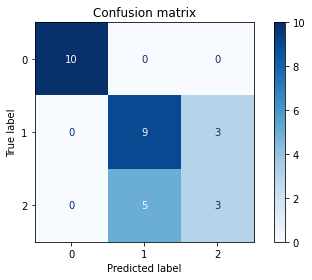

In [70]:
linear_accuracy = accuracy_score(y_test, y_pred_linear)
linear_f1 = f1_score(y_test, y_pred_linear, average='weighted')
linear_cm = confusion_matrix(y_test,y_pred_linear)
linear_classification_report = classification_report(y_test,y_pred_linear)
print('Accuracy (linear Kernel): ', "%.2f" % (linear_accuracy*100))
print(linear_classification_report)
print(linear_cm)

title = "Confusion matrix"
disp = plot_confusion_matrix(linear_svm, X_test, y_test, cmap=plt.cm.Blues,)
disp.ax_.set_title(title)
disp.figure_.tight_layout()

Accuracy (Polynomial Kernel):  70.00
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.60      0.75      0.67        12
           2       0.50      0.38      0.43         8

    accuracy                           0.70        30
   macro avg       0.70      0.67      0.68        30
weighted avg       0.71      0.70      0.70        30

[[9 1 0]
 [0 9 3]
 [0 5 3]]


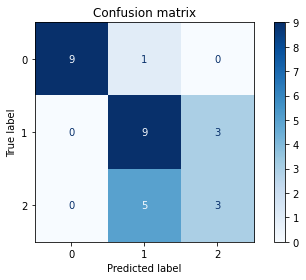

In [71]:
poly_accuracy = accuracy_score(y_test, y_pred_poly)
poly_f1 = f1_score(y_test, y_pred_poly, average='weighted')
poly_cm = confusion_matrix(y_test,y_pred_poly)
poly_classification_report = classification_report(y_test,y_pred_poly)
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print(poly_classification_report)
print(poly_cm)

title = "Confusion matrix"
disp = plot_confusion_matrix(poly_svm, X_test, y_test, cmap=plt.cm.Blues,)
disp.ax_.set_title(title)
disp.figure_.tight_layout()

Creating a mesh to make the plot

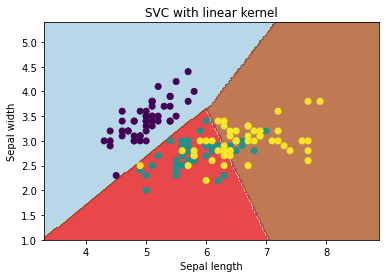

In [77]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = linear_fit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

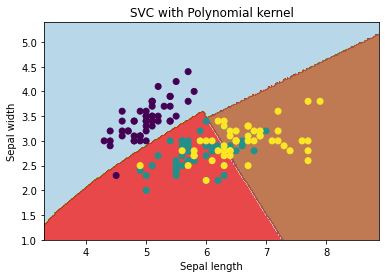

In [100]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = poly_fit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Polynomial kernel')
plt.show()

# Q2. For many real life data sets the decision boundaries are not linear. How is this non-linearity dealt with by SVMs? Take one dataset and implement solution to this problem.

In [117]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, plot_confusion_matrix, mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

dataset = datasets.load_iris()

X = dataset.data[:, :2]
y = dataset.target
X[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [118]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [119]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [120]:
X_train[0:5], X_test[0:5]

(array([[6.5, 3. ],
        [5.5, 2.5],
        [6.5, 3. ],
        [5.8, 2.7],
        [6.8, 3. ]]), array([[5.5, 4.2],
        [5.4, 3.9],
        [5. , 3.5],
        [7.2, 3. ],
        [7. , 3.2]]))

In [121]:
y_train, y_test

(array([2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0,
        2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2,
        0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0,
        2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1,
        2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
        2, 0, 2, 1, 1, 1, 1, 1, 0, 1]),
 array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
        1, 1, 1, 1, 1, 2, 0, 0]))

SVM using rbf kernel

In [122]:
C = [1, 100, 1000]
gamma = [1, 10, 100]
rbf_svm =[[0]*3]*3
for i in range(3):
    for j in range(3):
        # print("C = {0}, gamma = {1}".format(C[i],gamma[j]))
        rbf_svm[i][j] = svm.SVC(kernel='rbf', gamma=gamma[j], C=C[i])

Fitting the training dataset in the models

In [123]:
rbf_fit = [[0]*3]*3
for i in range(3):
    for j in range(3):
        rbf_fit[i][j] = rbf_svm[i][j].fit(X_train,y_train)

Prediction

In [124]:
rbf_predict = [[0]*3]*3
for i in range(3):
    for j in range(3):
        rbf_predict[i][j] = rbf_fit[i][j].predict(X_test)

Printing metrics

C = 1 AND gamma = 1
Accuracy (rbf Kernel):  70.00
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      0.67      0.67        12
           2       0.44      0.50      0.47         8

    accuracy                           0.70        30
   macro avg       0.70      0.69      0.69        30
weighted avg       0.72      0.70      0.71        30

[[9 0 1]
 [0 8 4]
 [0 4 4]]


C = 1 AND gamma = 10
Accuracy (rbf Kernel):  66.67
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.58      0.58      0.58        12
           2       0.44      0.50      0.47         8

    accuracy                           0.67        30
   macro avg       0.68      0.66      0.67        30
weighted avg       0.69      0.67      0.67        30

[[9 1 0]
 [0 7 5]
 [0 4 4]]


C = 1 AND gamma = 100
Accuracy (rbf Kernel):  56.67
              precision  

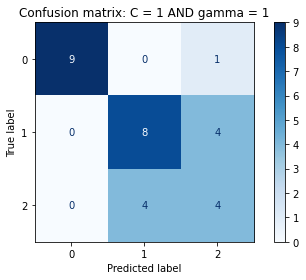

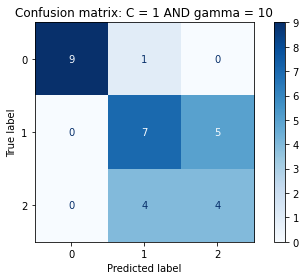

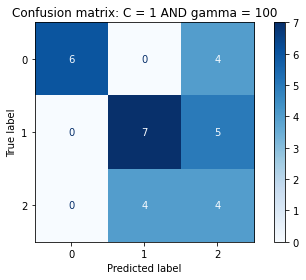

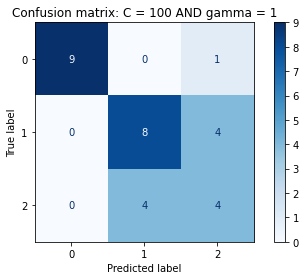

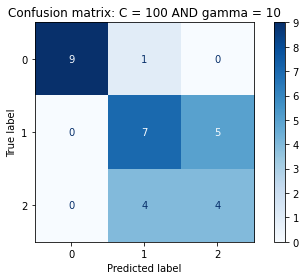

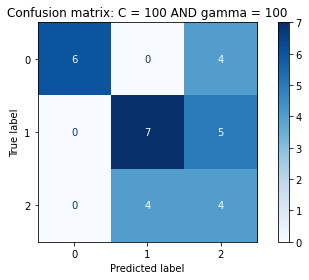

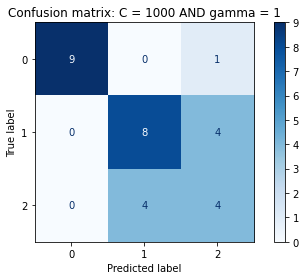

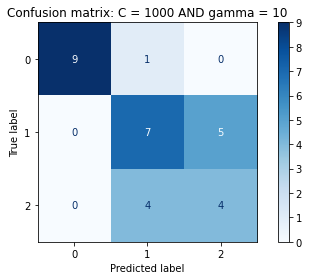

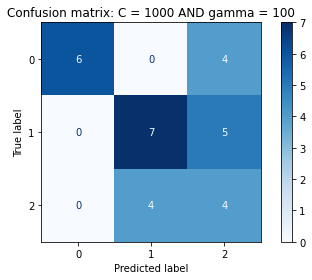

In [125]:
for i in range(3):
    for j in range(3):
        print("C = {0} AND gamma = {1}".format(C[i],gamma[j]))
        rbf_accuracy = accuracy_score(y_test, rbf_predict[i][j])
        rbf_f1 = f1_score(y_test, rbf_predict[i][j], average='weighted')
        rbf_cm = confusion_matrix(y_test,rbf_predict[i][j])
        rbf_classification_report = classification_report(y_test,rbf_predict[i][j])
        print('Accuracy (rbf Kernel): ', "%.2f" % (rbf_accuracy*100))
        print(rbf_classification_report)
        print(rbf_cm)
        print("\n")
        title = "Confusion matrix: C = {0} AND gamma = {1}".format(C[i],gamma[j])
        disp = plot_confusion_matrix(rbf_svm[i][j], X_test, y_test, cmap=plt.cm.Blues,)
        disp.ax_.set_title(title)
        disp.figure_.tight_layout()

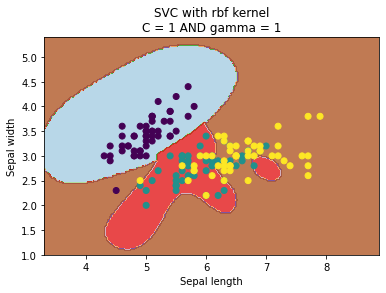

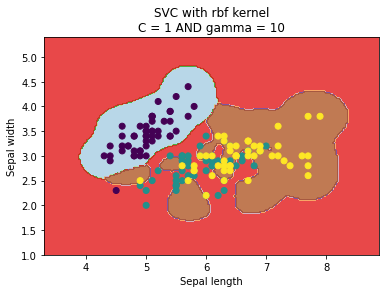

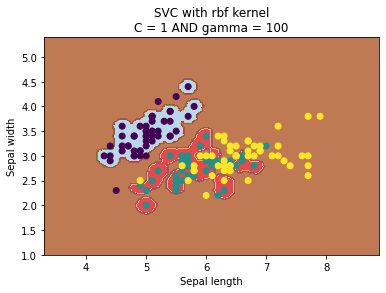

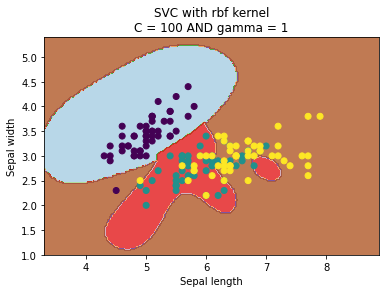

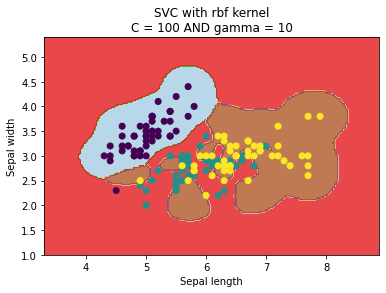

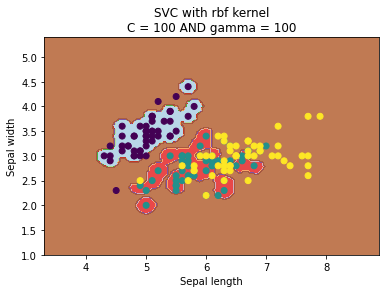

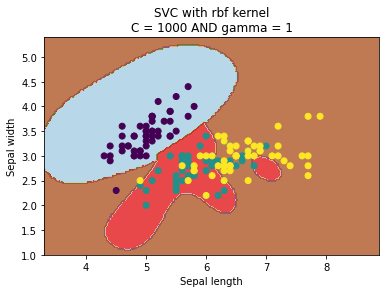

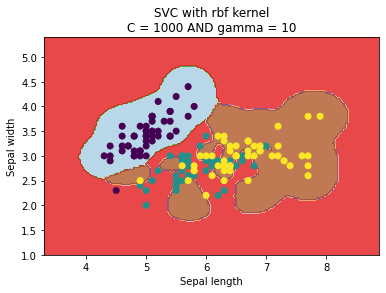

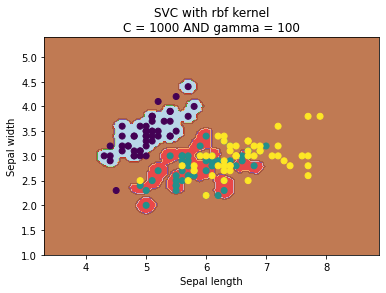

In [126]:
Z = [[0]*3]*3
for i in range(3):
    for j in range(3):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        h = (x_max / x_min)/100
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))

        plt.subplot(1, 1, 1)
        Z[i][j] = rbf_fit[i][j].predict(np.c_[xx.ravel(), yy.ravel()])
        Z[i][j] = Z[i][j].reshape(xx.shape)
        plt.contourf(xx, yy, Z[i][j], cmap=plt.cm.Paired, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('SVC with rbf kernel\nC = {0} AND gamma = {1}'.format(C[i],gamma[j]))
        plt.show()